# Assignment - Audio Processing
Classify with audio features from librosa
### Sameera Holy SHEIK ABDULLAH

From the given input set, 5 classes are chosen namely yes, no, wow, left and right. This notebook aims to classify the audio sample words into its respective category

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import librosa as lb
import librosa.display as lbd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from tensorflow.keras import layers, models
from pprint import pprint

In [ ]:
train_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 2/data/train/'
test_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 2/data/test'

# Loading audio with librosa

### Yes-Word

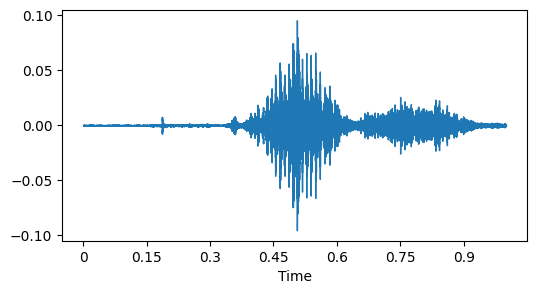

In [ ]:
class_1, sampling_rate = lb.load(os.path.join(train_path, "yes/0c5027de_nohash_0.wav"))
plt.figure(figsize=(6, 3))
lbd.waveshow(class_1, sr=sampling_rate)
plt.show()

### No - Word


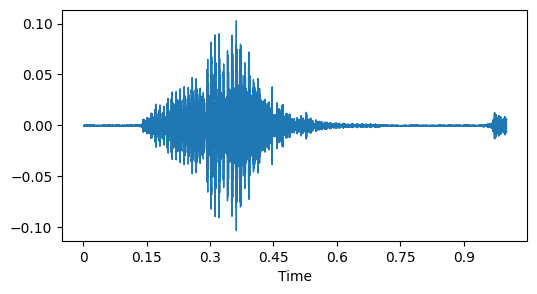

In [ ]:
# %loading the audio with librosa
class_2, sampling_rate = lb.load(os.path.join(train_path, "no/0c5027de_nohash_0.wav"))
plt.figure(figsize=(6, 3))
lbd.waveshow(class_2, sr=sampling_rate)
plt.show()

# Plotting the amplitude

### Yes

Text(0, 0.5, 'Amplitude')

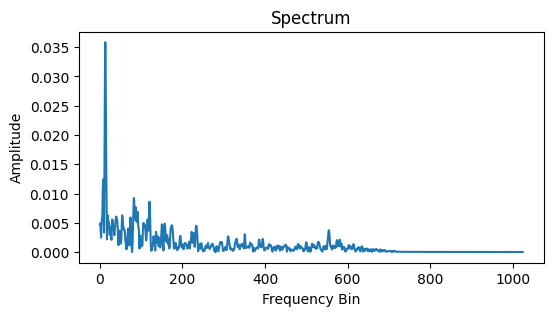

In [ ]:
n_fft = 2048
plt.figure(figsize=(6, 3))
ft1 = np.abs(lb.stft(class_1[:n_fft], hop_length = n_fft+1))
plt.plot(ft1)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

### No

Text(0, 0.5, 'Amplitude')

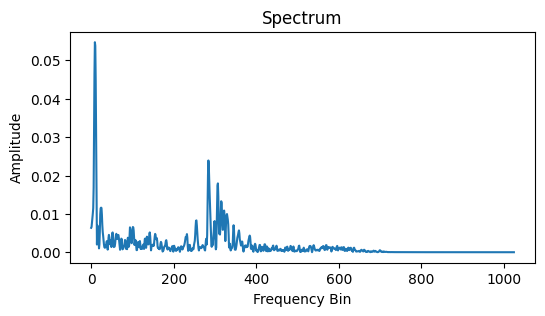

In [ ]:
n_fft = 2048
plt.figure(figsize=(6, 3))
ft2 = np.abs(lb.stft(class_2[:n_fft], hop_length = n_fft+1))
plt.plot(ft2)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

# Load the dataset (the features are extracted in another notebook)

In [ ]:
audio_dataset_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 2/dataset_words.csv'
data = pd.read_csv(audio_dataset_path)
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,f33660af_nohash_0.wav,0.260215,0.023304,2475.003408,1678.498093,4364.878152,0.161288,-385.940460,92.163452,-29.320704,...,-10.510818,-2.240241,-16.285070,0.940247,-5.501032,3.052858,-6.962941,3.922584,1.228272,yes
1,4beff0c5_nohash_0.wav,0.471389,0.010177,2087.513956,1637.489569,3903.209731,0.110825,-498.736267,105.408653,-34.984341,...,-0.508225,5.689213,-0.440681,13.820652,-2.133470,2.953540,-0.617332,3.967803,8.779277,yes
2,23059a35_nohash_0.wav,0.522180,0.043510,2139.455267,1877.906506,4353.622159,0.108987,-368.454590,87.961746,-4.310174,...,-0.232215,1.085945,-0.773728,9.062412,-5.770372,4.585590,-0.527528,1.423684,0.417223,yes
3,9aa21fa9_nohash_0.wav,0.376999,0.036615,1869.449058,1705.980041,3402.001398,0.126287,-429.344421,71.963547,9.951335,...,-5.861587,1.390802,-7.003134,5.625087,-9.471489,-1.189207,2.154735,-4.555917,-3.291821,yes
4,9a4d12fd_nohash_1.wav,0.486226,0.015856,1062.701919,1543.363355,2210.304521,0.034073,-417.614563,157.838623,11.303876,...,8.196647,12.979264,-6.541313,13.698481,-5.716538,5.265283,3.326395,-0.155093,1.392806,yes


In [ ]:
audio_dataset_path_test = r'drive/MyDrive/EPITA/Signal Processing/Assi 2/dataset_words_test.csv'
test = pd.read_csv(audio_dataset_path_test)
test.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,96a48d28_nohash_3.wav,0.463217,0.045049,3041.484158,1573.007590,4765.199973,0.235030,-385.012115,34.410332,-14.010667,...,-9.601284,2.538015,-7.371799,1.502855,-8.388675,-4.378359,-7.104741,0.563538,-3.183703,yes
1,712e4d58_nohash_4.wav,0.472263,0.012081,2599.122002,1665.731972,4458.841220,0.190530,-601.475708,59.951229,-5.181655,...,-5.286703,-1.108068,-5.800531,4.236637,-3.972558,-4.388499,-0.533150,-3.344841,-3.332309,yes
2,41285056_nohash_2.wav,0.447255,0.010896,2186.540724,1562.934870,3799.034751,0.161252,-458.814453,126.700638,-40.457066,...,-12.687171,-0.832038,-9.641199,3.452296,-2.469326,-3.296853,-2.312520,-10.549315,-2.212594,yes
3,1a5b9ca4_nohash_1.wav,0.432775,0.009065,1116.733623,1224.418807,2217.430531,0.071067,-498.642395,152.768295,-6.610372,...,-9.275613,1.009029,-13.459415,-6.869143,-2.629051,-15.515281,-8.725619,-10.675380,-12.597982,yes
4,05b2db80_nohash_1.wav,0.751490,0.046390,2117.630395,2177.749814,4874.334162,0.036410,-301.088348,89.639351,-46.952755,...,-3.411567,15.333292,-7.434482,14.720456,-5.416794,8.570045,-0.206479,4.144481,3.758568,yes


# Preprocessing

In [ ]:
data['label'].value_counts()

yes      300
no       300
wow      300
left     300
right    300
Name: label, dtype: int64

In [ ]:
data = data.drop(['filename'],axis=1)

In [ ]:
test = test.drop(['filename'],axis=1)

Train and validation set

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Test set

In [ ]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

## Train test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

## Encoding the labels and scaling the features

Convert the target classes to labels

In [ ]:
encoder = LabelEncoder() #Encoding the Labels
y_train_enc = encoder.fit_transform(y_train)
y_val_enc = encoder.transform(y_val)
y_test_enc = encoder.transform(y_test)

Scaling the variables

In [ ]:
scaler = StandardScaler() #Scaling the Features
X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)
X_test_scl = scaler.transform(X_test)

# Defining functions

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
def model_perf(y_test, y_pred, model=''):
  print("Confusion Matrix:")
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, cmap='Blues',annot=True)
  plt.show()

  print(f"\nAccuracy of {model} is {round(accuracy_score(y_test, y_pred), 3)*100}% \n")

  cr = classification_report(y_test, y_pred).split('\n')
  print("Classification Report:")
  pprint(cr)

In [ ]:
def plot_results(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.columns=["loss", "accuracy", "val_loss", "val_accuracy"]
    hist_df.index = np.arange(1, len(hist_df)+1)

    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_accuracy, lw=3, label='Validation Accuracy')
    axs[0].plot(hist_df.accuracy, lw=3, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=3, label='Validation Loss')
    axs[1].plot(hist_df.loss, lw=3, label='Training Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)

    plt.show();

# SVM

## SVM-Polynomial Kernel

### Train

Lets try with simple SVM-Polynomial kernel for classifiying the audios. It can handle moderately complex decision boundaries

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly', degree=2, gamma='scale', random_state=42)
clf.fit(X_train_scl, y_train_enc)

SVC(degree=2, kernel='poly', random_state=42)

### Prediction and Performance

In [ ]:
predicted = clf.predict(X_test_scl)
y_test_enc.shape

(150,)

Confusion Matrix:


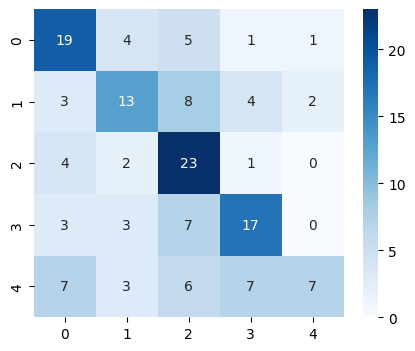


Accuracy of SVM is 52.7% 

Classification Report:
['              precision    recall  f1-score   support',
 '',
 '           0       0.53      0.63      0.58        30',
 '           1       0.52      0.43      0.47        30',
 '           2       0.47      0.77      0.58        30',
 '           3       0.57      0.57      0.57        30',
 '           4       0.70      0.23      0.35        30',
 '',
 '    accuracy                           0.53       150',
 '   macro avg       0.56      0.53      0.51       150',
 'weighted avg       0.56      0.53      0.51       150',
 '']


In [ ]:
model_perf(y_test_enc, predicted, "SVM")

The accuracy of this model is very low. Polynomial kernel is not good at classsifying the model. From the experimentation, I conclude that higher the degree of polynomial, lower the accuracy is.

## SVM-RBF kernel

The RBF kernel can handle non-linearly separable data effectively. It transforms the data into a high-dimensional space, making it more likely that the classes become separable.

### Train

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', random_state=42)
clf.fit(X_train_scl, y_train_enc)

SVC(random_state=42)

### Prediction and Performance

In [ ]:
predicted = clf.predict(X_test_scl)

Confusion Matrix:


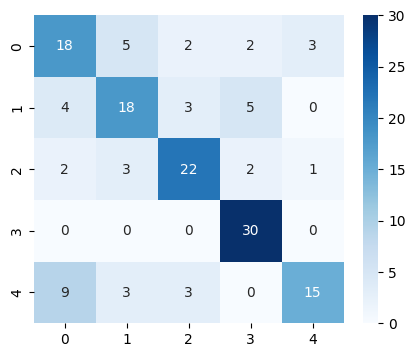


Accuracy of SVM-RBF is 68.7% 

Classification Report:
['              precision    recall  f1-score   support',
 '',
 '           0       0.55      0.60      0.57        30',
 '           1       0.62      0.60      0.61        30',
 '           2       0.73      0.73      0.73        30',
 '           3       0.77      1.00      0.87        30',
 '           4       0.79      0.50      0.61        30',
 '',
 '    accuracy                           0.69       150',
 '   macro avg       0.69      0.69      0.68       150',
 'weighted avg       0.69      0.69      0.68       150',
 '']


In [ ]:
model_perf(y_test_enc, predicted, "SVM-RBF")

The accuracy is better than polynomial kernel. But it needs an improvement

# BPNN - Back Propogation Neural Network

In [ ]:
y_train_encoded = np.eye(5)[y_train_enc]
y_val_encoded = np.eye(5)[y_val_enc]
y_test_encoded = np.eye(5)[y_test_enc]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scl, y_train_encoded,
          batch_size=16,
          epochs=50,
          verbose=1,
          validation_data=(X_val_scl, y_val_encoded))

Epoch 1/50
85/85 [==============================] - 2s 5ms/step - loss: 1.6083 - accuracy: 0.2267 - val_loss: 1.5992 - val_accuracy: 0.2400
Epoch 2/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5967 - accuracy: 0.2541 - val_loss: 1.5903 - val_accuracy: 0.2467
Epoch 3/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5889 - accuracy: 0.2807 - val_loss: 1.5802 - val_accuracy: 0.2800
Epoch 4/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5751 - accuracy: 0.2985 - val_loss: 1.5689 - val_accuracy: 0.3467
Epoch 5/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5597 - accuracy: 0.3267 - val_loss: 1.5582 - val_accuracy: 0.4000
Epoch 6/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5418 - accuracy: 0.3637 - val_loss: 1.5469 - val_accuracy: 0.4000
Epoch 7/50
85/85 [==============================] - 0s 3ms/step - loss: 1.5283 - accuracy: 0.3785 - val_loss: 1.5346 - val_accuracy: 0.4067
Epoch 8/50
85/85 [==

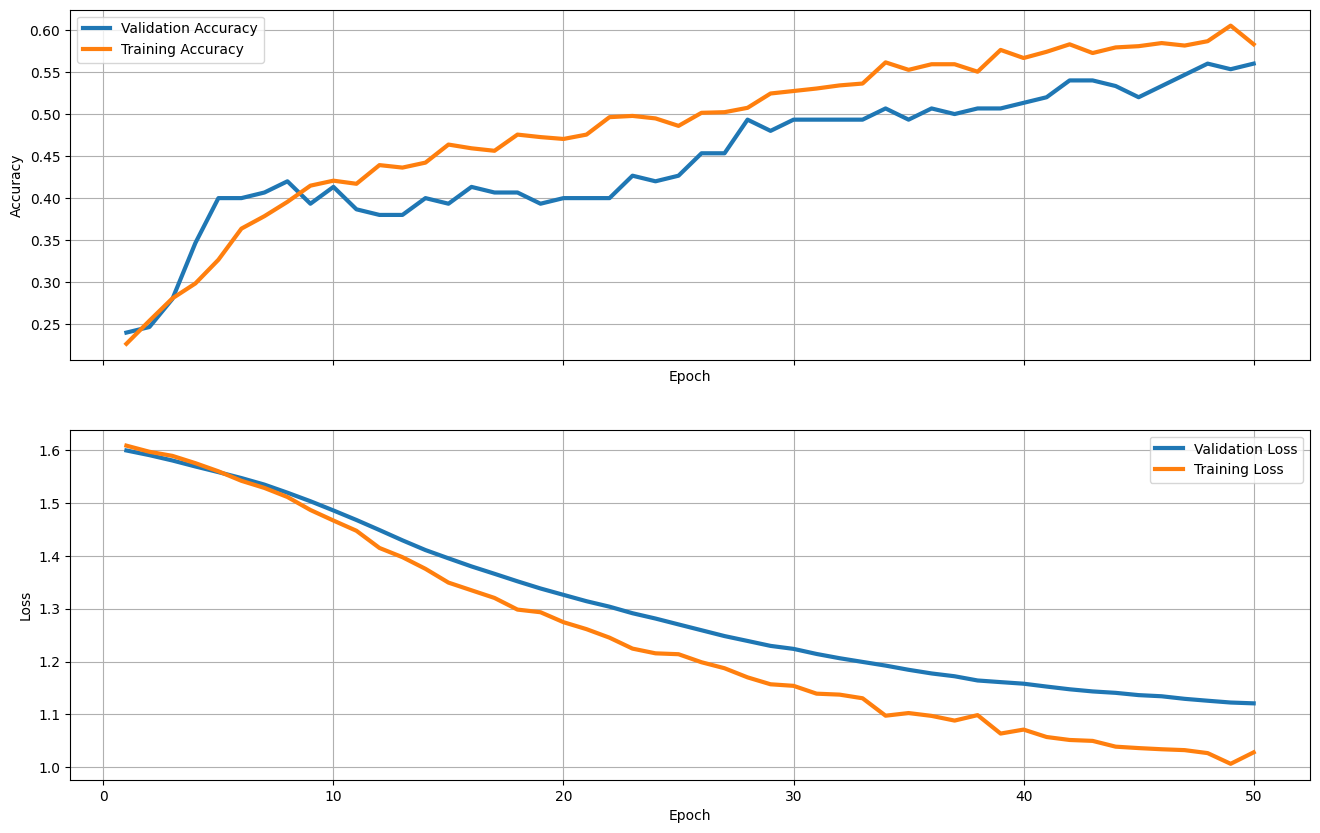

In [ ]:
plot_results(history)

In [ ]:
predicted = model.predict(X_test_scl)
predicted = np.argmax(predicted, axis=1)

5/5 [==============================] - 0s 3ms/step


Confusion Matrix:


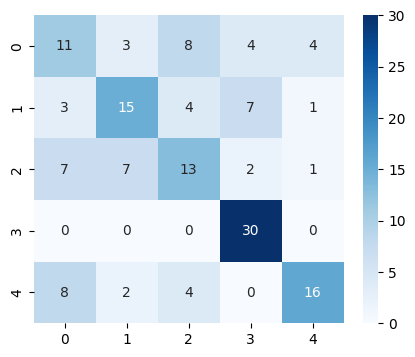


Accuracy of BPNN is 56.699999999999996% 

Classification Report:
['              precision    recall  f1-score   support',
 '',
 '           0       0.38      0.37      0.37        30',
 '           1       0.56      0.50      0.53        30',
 '           2       0.45      0.43      0.44        30',
 '           3       0.70      1.00      0.82        30',
 '           4       0.73      0.53      0.62        30',
 '',
 '    accuracy                           0.57       150',
 '   macro avg       0.56      0.57      0.56       150',
 'weighted avg       0.56      0.57      0.56       150',
 '']


In [ ]:
model_perf(y_test_enc, predicted, "BPNN")

The BPNN model with audio features gives lesser accuracy than SVM.
